In [1]:
from backtester import *

1. down sampling --> e.g. 'm5' to 'H1' (i.e. '60min')
2. get signals from downsampling
3. add signals from downsampling to original data --> i.e. smoothed signals
4. ffill() the smoothed signals

In [2]:
path = 'forex_prices/m5/NZD_USD_m5.csv'
freq = path.split('.')[0].split('_')[-1]
data = pd.read_csv(path, index_col=['date'], parse_dates=['date'])

In [3]:
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)

display(data.head())
print(data.shape)

resamp = data.copy()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-21 12:35:00,0.69241,0.69222,0.69252,0.69222,0.69261,0.69241,0.69271,0.69240,333,0.692510,0.692615,0.692310,0.692315
2021-07-21 12:40:00,0.69222,0.69211,0.69252,0.69211,0.69241,0.69230,0.69270,0.69229,419,0.692315,0.692610,0.692200,0.692205
2021-07-21 12:45:00,0.69211,0.69186,0.69211,0.69165,0.69230,0.69203,0.69229,0.69181,602,0.692205,0.692200,0.691730,0.691945
2021-07-21 12:50:00,0.69186,0.69224,0.69244,0.69182,0.69203,0.69242,0.69263,0.69201,427,0.691945,0.692535,0.691915,0.692330
2021-07-21 12:55:00,0.69224,0.69252,0.69255,0.69219,0.69242,0.69271,0.69272,0.69238,307,0.692330,0.692635,0.692285,0.692615


(10000, 13)


In [4]:
ema_periods = (10, 50)
for i, n in enumerate(ema_periods):
    data[f'ema_{i}'] = ta.trend.ema_indicator(data['close'], window=n, fillna=False)
    
data.dropna(inplace=True)
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,ema_0,ema_1
date,,,,,,,,,,,,,,,
2021-07-21 16:40:00,0.69589,0.69592,0.69600,0.69582,0.69609,0.69610,0.69616,0.69602,418,0.69599,0.696080,0.695920,0.696010,0.696287,0.695139
2021-07-21 16:45:00,0.69592,0.69599,0.69608,0.69582,0.69610,0.69617,0.69624,0.69601,538,0.69601,0.696160,0.695915,0.696080,0.696250,0.695176
2021-07-21 16:50:00,0.69599,0.69610,0.69616,0.69589,0.69617,0.69630,0.69634,0.69607,579,0.69608,0.696250,0.695980,0.696200,0.696241,0.695216
2021-07-21 16:55:00,0.69610,0.69613,0.69622,0.69600,0.69630,0.69631,0.69640,0.69619,485,0.69620,0.696310,0.696095,0.696220,0.696237,0.695256
2021-07-21 17:00:00,0.69613,0.69644,0.69651,0.69608,0.69631,0.69663,0.69668,0.69628,1051,0.69622,0.696595,0.696180,0.696535,0.696291,0.695306


(9951, 15)


In [5]:
data['signal'] = np.where(data['ema_0'] > data['ema_1'], 1, np.where(data['ema_0'] < data['ema_1'], -1, 0)) 

## Down sampling

In [6]:
resamp = resamp.resample('60min').last().dropna().iloc[:-1]
display(resamp.head())
print(resamp.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-21 12:00:00,0.69224,0.69252,0.69255,0.69219,0.69242,0.69271,0.69272,0.69238,307.0,0.69233,0.692635,0.692285,0.692615
2021-07-21 13:00:00,0.69445,0.69446,0.69482,0.69425,0.69463,0.69466,0.69499,0.69444,1051.0,0.69454,0.694905,0.694345,0.694560
2021-07-21 14:00:00,0.69477,0.69510,0.69538,0.69476,0.69495,0.69529,0.69553,0.69493,1024.0,0.69486,0.695455,0.694845,0.695195
2021-07-21 15:00:00,0.69690,0.69677,0.69701,0.69668,0.69708,0.69694,0.69719,0.69688,532.0,0.69699,0.697100,0.696780,0.696855
2021-07-21 16:00:00,0.69610,0.69613,0.69622,0.69600,0.69630,0.69631,0.69640,0.69619,485.0,0.69620,0.696310,0.696095,0.696220


(840, 13)


In [7]:
for i, n in enumerate(ema_periods):
    resamp[f'ema_{i}'] = ta.trend.ema_indicator(resamp['close'], window=n, fillna=False)
    
resamp.dropna(inplace=True)
resamp['signal'] = np.where(resamp['ema_0'] > resamp['ema_1'], 1, np.where(resamp['ema_0'] < resamp['ema_1'], -1, 0)) 
display(resamp.head())
print(resamp.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,ema_0,ema_1,signal
date,,,,,,,,,,,,,,,,
2021-07-23 13:00:00,0.69761,0.69770,0.69777,0.69715,0.69777,0.69787,0.69795,0.69734,1541.0,0.697690,0.697860,0.697245,0.697785,0.697915,0.696612,1
2021-07-23 14:00:00,0.69709,0.69724,0.69741,0.69690,0.69726,0.69739,0.69758,0.69706,1343.0,0.697175,0.697495,0.696980,0.697315,0.697806,0.696640,1
2021-07-23 15:00:00,0.69738,0.69728,0.69755,0.69722,0.69757,0.69747,0.69772,0.69740,798.0,0.697475,0.697635,0.697310,0.697375,0.697727,0.696669,1
2021-07-23 16:00:00,0.69813,0.69818,0.69821,0.69801,0.69831,0.69834,0.69840,0.69817,469.0,0.698220,0.698305,0.698090,0.698260,0.697824,0.696731,1
2021-07-23 17:00:00,0.69779,0.69769,0.69781,0.69768,0.69799,0.69791,0.69801,0.69787,384.0,0.697890,0.697910,0.697775,0.697800,0.697820,0.696773,1


(791, 16)


## Smooth signals

In [8]:
### TO AVOID Look-Ahead Bias ###
# shift(1) since we're using the close price
data['smooth_signal'] = resamp['signal'].shift(1)

# shift(-1) since we would trade '5min' before the first hour signal
# then foreward fill
data['smooth_signal'] = data['smooth_signal'].shift(-1).ffill()

data.dropna(inplace=True)

In [9]:
print('*** Original Positions counting ***')
print(data['signal'].value_counts())
print('-'*50)
print('*** Smoothed Positions counting ***')
print(data['smooth_signal'].value_counts())
print("-"*50)

*** Original Positions counting ***
 1    4806
-1    4603
Name: signal, dtype: int64
--------------------------------------------------
*** Smoothed Positions counting ***
 1.0    5752
-1.0    3657
Name: smooth_signal, dtype: int64
--------------------------------------------------


In [10]:
print('*** Original Positions changing ***')
print(data['signal'].diff(1).apply(np.abs).value_counts())
print('-'*50)
print('*** Smoothed Positions changing ***')
print(data['smooth_signal'].diff(1).apply(np.abs).value_counts())
print("-"*50)

*** Original Positions changing ***
0.0    9126
2.0     282
Name: signal, dtype: int64
--------------------------------------------------
*** Smoothed Positions changing ***
0.0    9391
2.0      17
Name: smooth_signal, dtype: int64
--------------------------------------------------


## Backtesting

In [11]:
backtest_signal = IterativeBacktester(data=data, signals=data['signal'], freq=freq)

In [12]:
backtest_signal.backtest()

  0%|          | 0/9408 [00:00<?, ?it/s]

In [13]:
backtest_smooth = IterativeBacktester(data=data, freq=freq, signals=data['smooth_signal'])

In [14]:
backtest_smooth.backtest()

  0%|          | 0/9408 [00:00<?, ?it/s]

*** Original Signals ***


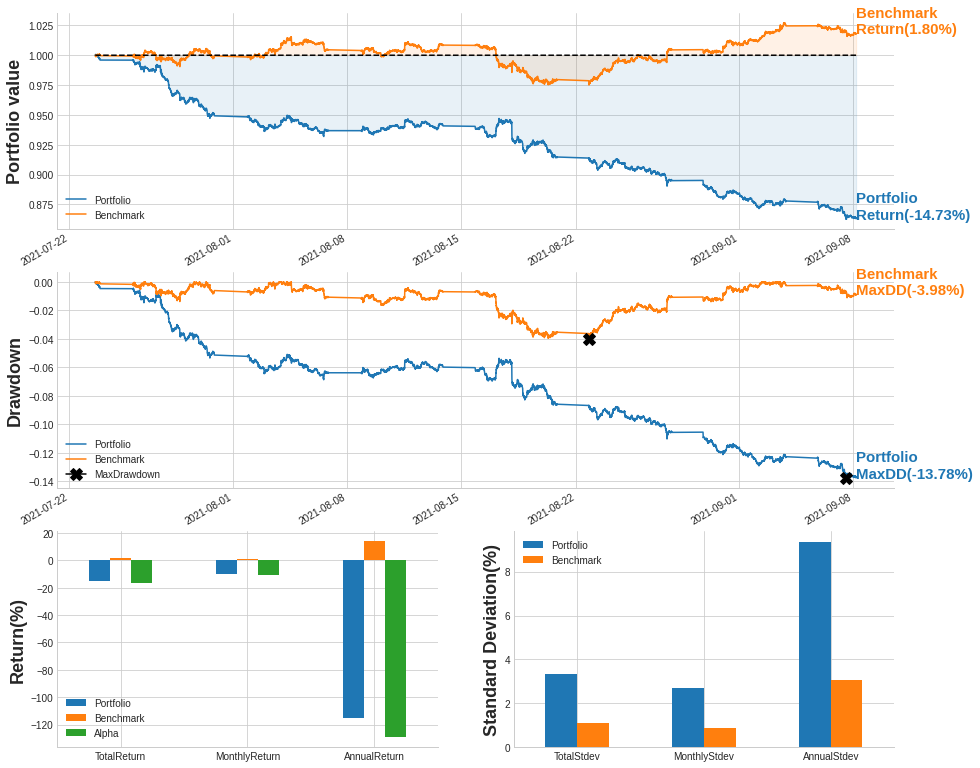

*** Smoothed Signals ***


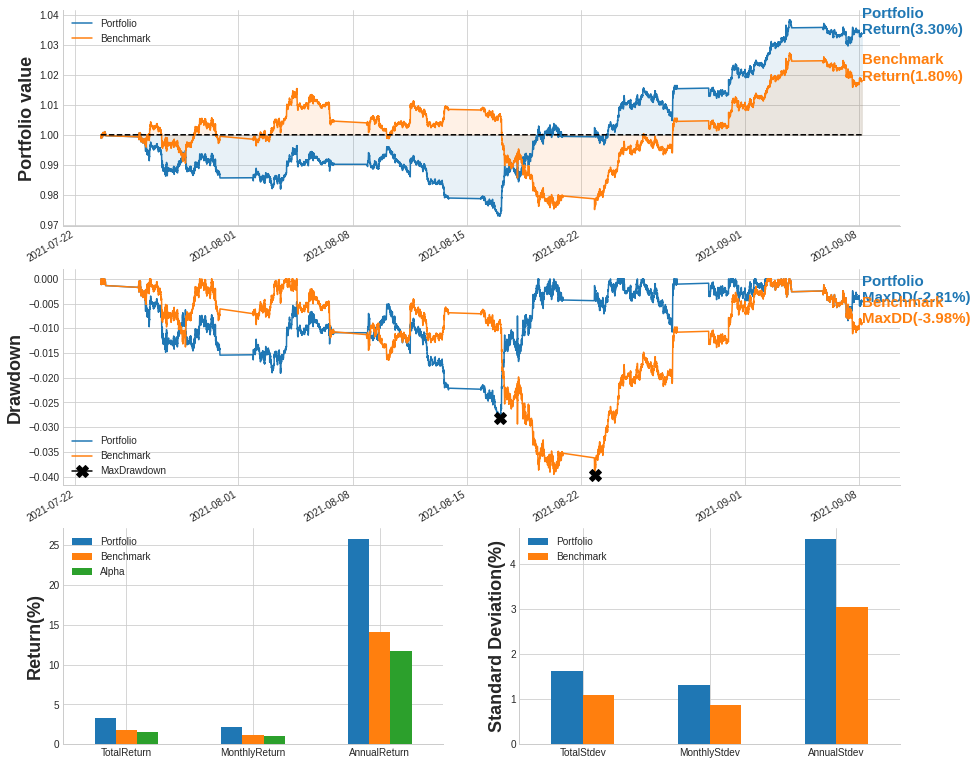

In [15]:
print('========================')
print('*** Original Signals ***')
print('========================')
backtest_signal.plot_portfolio()
print('========================')
print('*** Smoothed Signals ***')
print('========================')
backtest_smooth.plot_portfolio()